In [1]:
import os, sys
from os.path import dirname, join, abspath
sys.path.insert(0, abspath(join(dirname(os.getcwd()), '.')))

from functions.plots import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#sns.set_style("darkgrid")

dom_cur="usd"
for_cur="brl"

df = pd.read_parquet("../data/gold/macro_"+dom_cur+for_cur+".parquet")

df.yield_f12m_usd/=100
df.tail()

interest_usd  inflation_f12m_usd  cpi_usd  inflation_mom_usd  \
2021-11-01        0.0005            2.479840  278.524           0.006992   
2021-12-01        0.0006            2.620309  280.126           0.005752   
2022-01-01        0.0022            2.241758  281.933           0.006451   
2022-02-01        0.0035            2.606584  284.182           0.007977   
2022-03-01        0.0052            2.606584  287.708           0.012408   

            inflation_yoy_usd  interest_brl  fx_usdbrl  inflation_f12m_brl  \
2021-11-01           0.068284      0.076499     5.6569            0.058898   
2021-12-01           0.070965      0.091499     5.5749            0.051767   
2022-01-01           0.075259      0.091499     5.2893            0.054073   
2022-02-01           0.079120      0.106501     5.1599            0.054436   
2022-03-01           0.085576      0.116499     4.7264            0.062117   

            cpi_brl  inflation_mom_brl  inflation_yoy_brl  fxreal_usdbrl  \
2021-11-01  6075.69           0.009501           0.107385       5.692865   
2021-12-01  6120.04           0.007300           0.100610       5.601723   
2022-01-01  6153.09           0.005400           0.103794       5.320301   
2022-02-01  6215.24           0.010101           0.105437       5.179231   
2022-03-01  6315.93           0.016201           0.112994       4.726400   

            fx_brlusd  fxreal_brlusd  yield_f12m_usd  yield_f12m_brl  
2021-11-01   0.176775       0.175658       -0.024793        0.017601  
2021-12-01   0.179375       0.178517       -0.026197        0.039732  
2022-01-01   0.189061       0.187959       -0.022396        0.037426  
2022-02-01   0.193802       0.193079       -0.026031        0.052065  
2022-03-01   0.211578       0.211578       -0.026014        0.054382

# EXCHANGE RATE

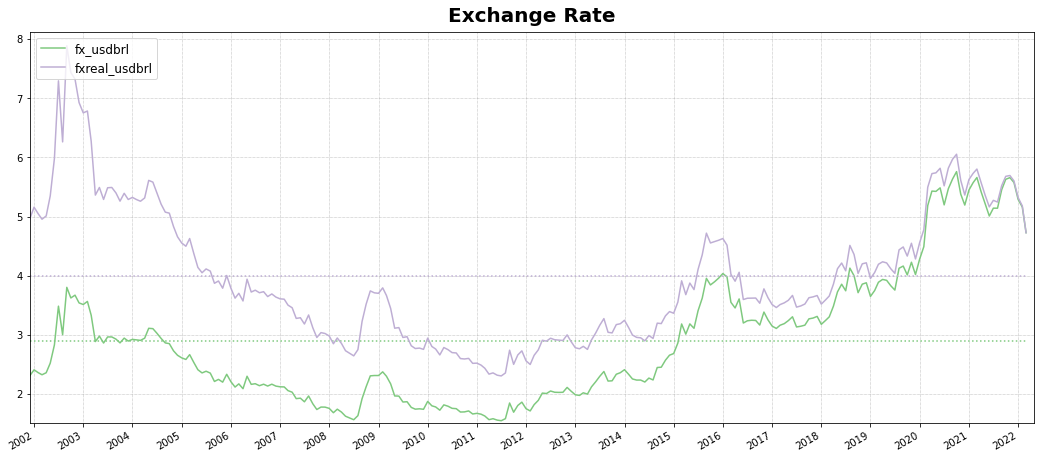

In [15]:
cols = ["fx_"+dom_cur+for_cur
        ,"fxreal_"+dom_cur+for_cur]

plot_timeseries(df[cols]
                ,title="Exchange Rate"
                ,plot_diff=False
                ,plot_var_mean=cols)

# INFLATION

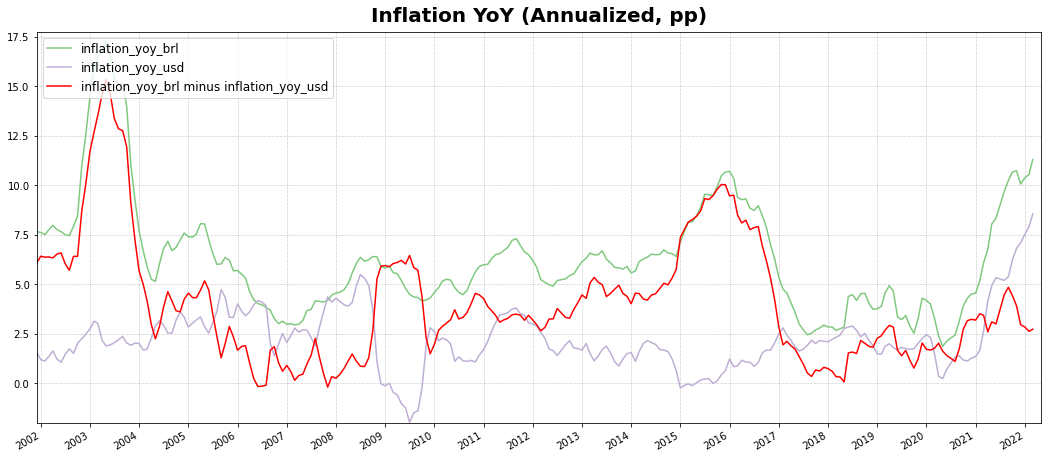

In [5]:
cols = ["inflation_yoy_"+for_cur
        ,"inflation_yoy_"+dom_cur]

plot_timeseries(df[cols]
                ,title="Inflation YoY (Annualized, pp)"
                ,scale_factor=100
                ,plot_diff=True
               )

# INTEREST RATE

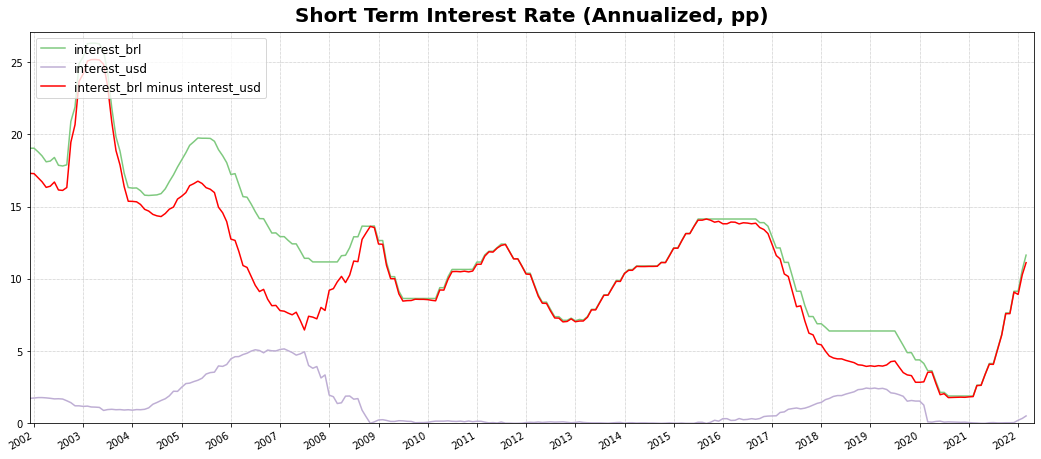

In [7]:
cols = ["interest_"+for_cur
        ,"interest_"+dom_cur]

plot_timeseries(df[cols]
                ,title="Short Term Interest Rate (Annualized, pp)"
                ,scale_factor=100
                ,plot_diff=True
               )

# FWD YIELD

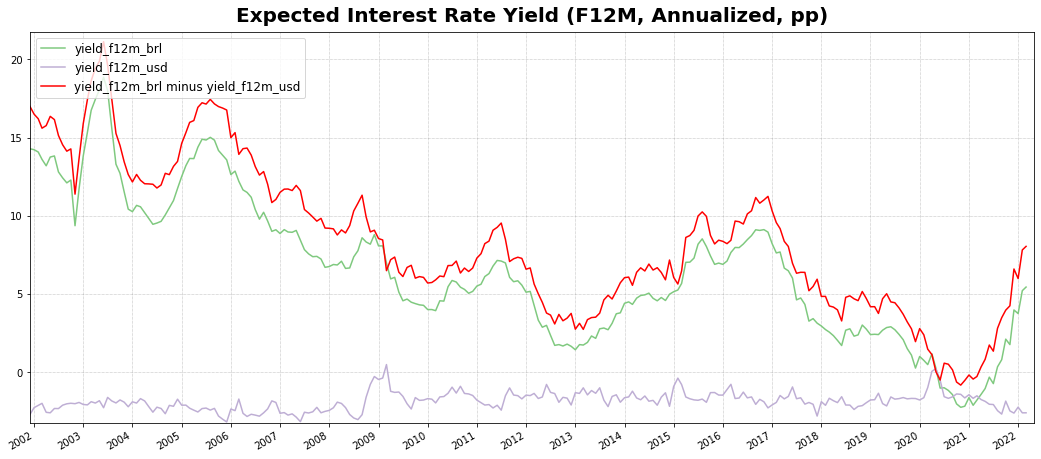

In [8]:
cols = ["yield_f12m_"+for_cur
        ,"yield_f12m_"+dom_cur]

plot_timeseries(df[cols]
                ,title="Expected Interest Rate Yield (F12M, Annualized, pp)"
                ,scale_factor=100
                ,plot_diff=True
               )

# OTHERS

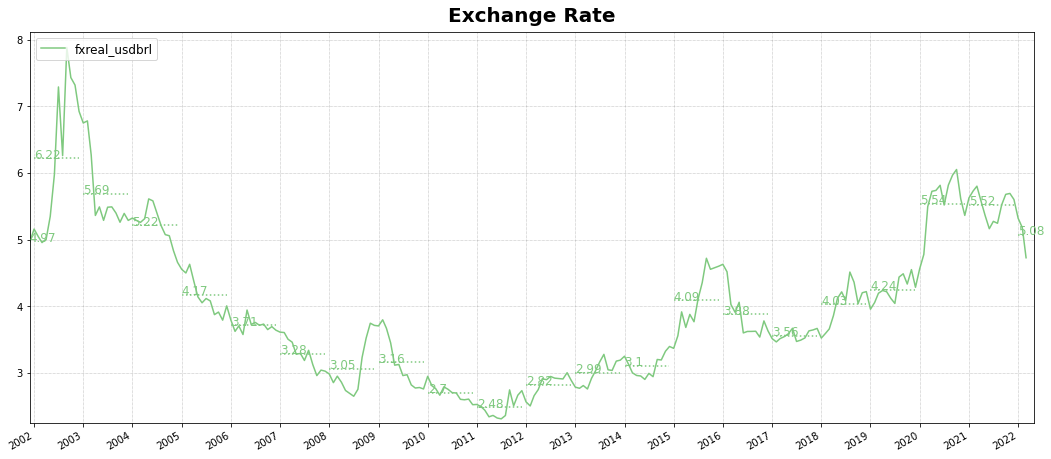

In [12]:
cols = ["fxreal_"+dom_cur+for_cur]

plot_timeseries(df[cols]
                ,title="Exchange Rate"
                ,plot_avg_year=cols)

C:\Users\drr19\AppData\Local\Temp\ipykernel_4364\3959570476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sup["yield_f12m_diff"] = (df["yield_f12m_brl"]-df["yield_f12m_usd"])


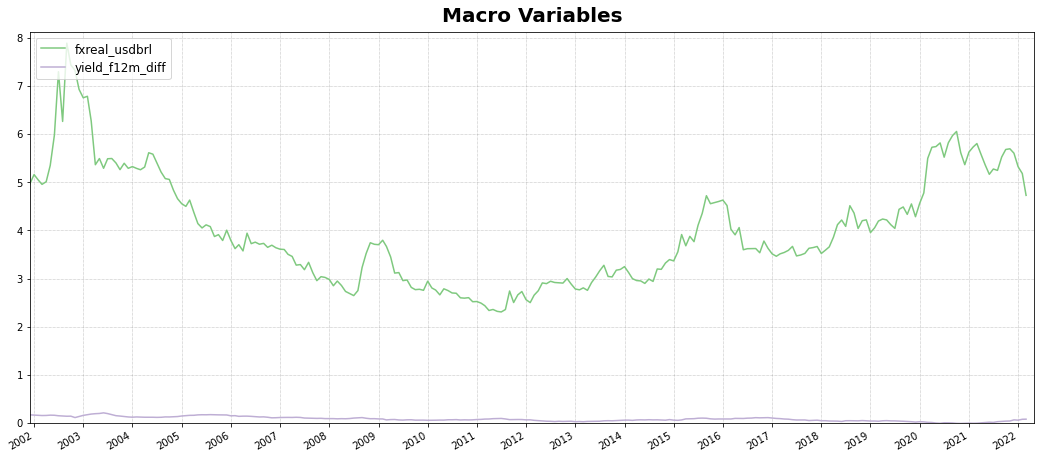

In [14]:
df_sup = df[["fxreal_"+dom_cur+for_cur]]
df_sup["yield_f12m_diff"] = (df["yield_f12m_brl"]-df["yield_f12m_usd"])

plot_timeseries(df_sup
                ,title="Macro Variables")

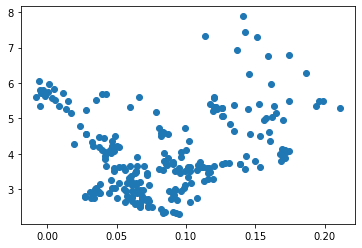

In [11]:
plt.scatter((df["yield_f12m_brl"]-df["yield_f12m_usd"])
            ,df["fxreal_usdbrl"])